<a href="https://colab.research.google.com/github/21700185-kimtaehong/Int_AI_sample/blob/main/0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,)) #784 = 28x28
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

In [2]:
#need to re-define input layer for decoder input
encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input, decoded)

outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# float32 / 255 : 값을 0~1로 만들기
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 4s 7ms/step - loss: 0.2766 - val_loss: 0.1884
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1707 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1448 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1285 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1117 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1066 - val_loss: 0.1032
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1026 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0976 - val_loss: 0.0956

In [5]:
import matplotlib.pyplot as plt

def display(array1, array2):
  """
  Displays ten random images from each one of the supplied arrays.
  """

  n = 10 # how many digits we will display
  plt.figure(figsize=(20, 4))

  for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  plt.show()


In [6]:
import tensorflow as tf

from tensorflow.python.keras import layers
# from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Model

def preprocess(array): 
  """ 
  Normalizes the supplied array and reshapes it into the appropriate format. 
  """ 
  
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [7]:
from keras.datasets import mnist
import numpy as np

(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [8]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
# autoencoder.summary()

In [9]:
autoencoder.fit(
  x=train_data,
  y=train_data,
  epochs=10,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data, test_data),
)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.1381 - val_loss: 0.0736
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0719 - val_loss: 0.0697
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0694 - val_loss: 0.0682
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0682 - val_loss: 0.0672
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0673 - val_loss: 0.0666
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0667 - val_loss: 0.0661
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0663 - val_loss: 0.0656
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0659 - val_loss: 0.0652
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 - val_loss: 0.0650
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0652 - val_loss: 0.0647

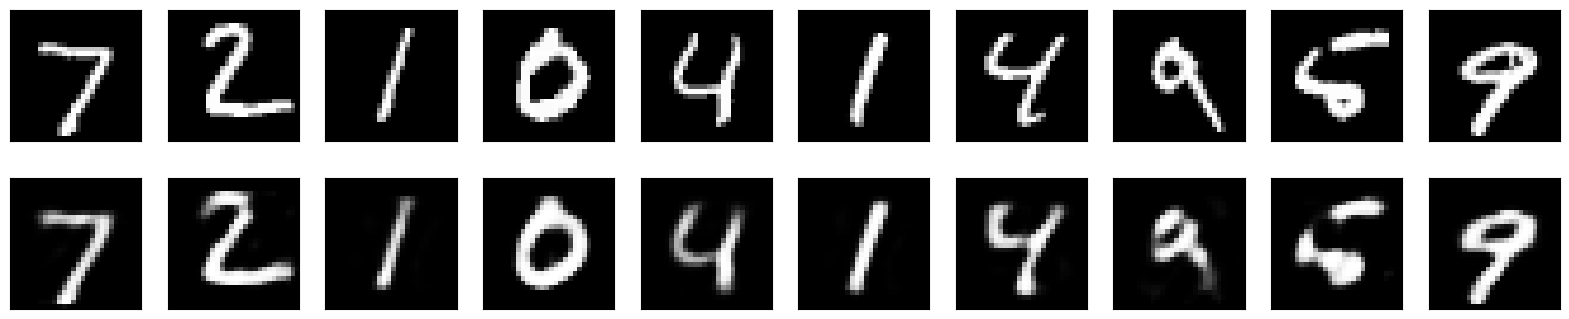

In [10]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [11]:
def noise(array):
  """
  Adds random noise to each image in the supplied array.
  """

  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape
  )

  return np.clip(noisy_array, 0.0, 1.0)

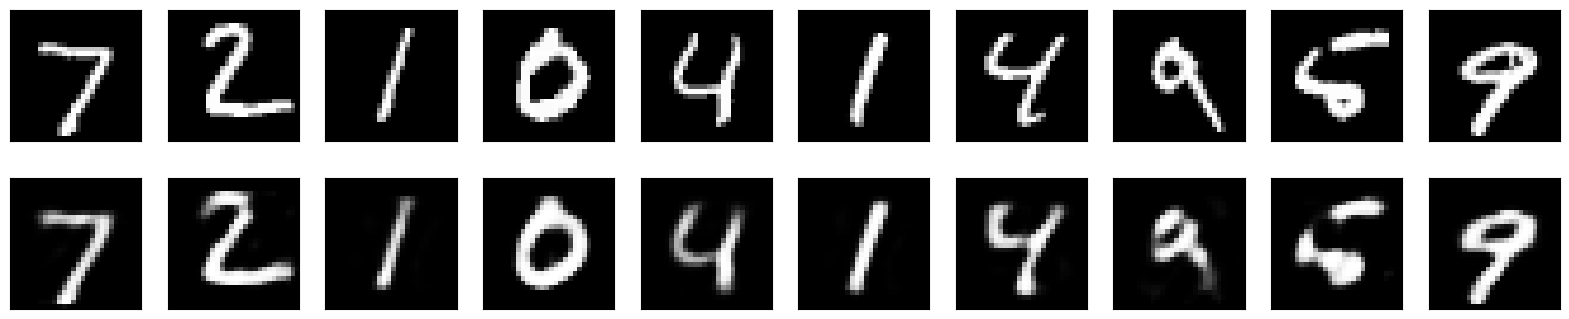

In [12]:
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [13]:
autoencoder.fit(
  x=noisy_train_data,
  y=train_data,
  epochs=10,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test_data, test_data),
) 

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1007 - val_loss: 0.0934
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0929 - val_loss: 0.0912
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0913 - val_loss: 0.0901
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0904 - val_loss: 0.0895
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0896 - val_loss: 0.0890
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0891 - val_loss: 0.0883
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0887 - val_loss: 0.0878
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0883 - val_loss: 0.0876
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0880 - val_loss: 0.0876
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0877 - val_loss: 0.0869

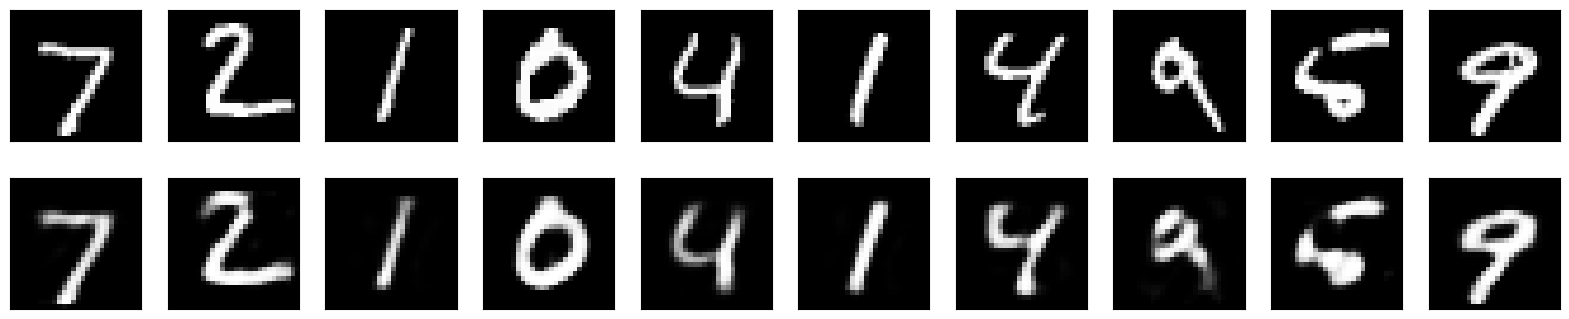

In [14]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)